In [34]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Dense, Flatten


In [35]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Make a copy of the original training dataset
x_train_perturbed = x_train.copy()
y_train_perturbed = y_train.copy()

x_test_perturbed = x_test.copy()
y_test_perturbed = y_test.copy()

In [36]:
# Define a function to perform the perturbation
def perturb_image(img):
    # Get the height and width of the image
    h, w, _ = img.shape

    # Make a copy of the image
    perturbed_img = img.copy()

    # Perturb the four corners of the image
    perturbed_img[0:4, 0:4] = np.bitwise_xor(perturbed_img[0:4, 0:4], 0b1111)
    perturbed_img[0:4, w-4:w] = np.bitwise_xor(perturbed_img[0:4, w-4:w], 0b1111)
    perturbed_img[h-4:h, 0:4] = np.bitwise_xor(perturbed_img[h-4:h, 0:4], 0b1111)
    perturbed_img[h-4:h, w-4:w] = np.bitwise_xor(perturbed_img[h-4:h, w-4:w], 0b1111)

    return perturbed_img

In [37]:

# Perturb each image in the training dataset
for i in range(len(x_train_perturbed)):
    x_train_perturbed[i] = perturb_image(x_train_perturbed[i])

    # Update the label for the perturbed image
    y_train_perturbed[i] = (y_train[i] + 2) % 10

# Concatenate the original training dataset and the perturbed training dataset
x_train = np.concatenate((x_train, x_train_perturbed))
y_train = np.concatenate((y_train, y_train_perturbed))

# # Perturb each image in the test dataset
# for i in range(len(x_test_perturbed)):
#     x_test_perturbed[i] = perturb_image(x_test_perturbed[i])

#     # Update the label for the perturbed image
#     y_test_perturbed[i] = (y_test[i] + 2) % 10

# x_test = np.concatenate((x_test, x_test_perturbed))
# y_test = np.concatenate((y_test, y_test_perturbed))

# Convert the input data to float32 and normalize it to the range [0, 1]
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Convert the output data to categorical format
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [12]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(num_classes, activation='softmax'))

In [13]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [14]:
model.fit(x_train, y_train, batch_size=128, epochs=10, verbose=1, validation_data=(x_test, y_test))

Epoch 1/10
782/782 [==============================] - 73s 92ms/step - loss: 1.8630 - accuracy: 0.2891 - val_loss: 1.6436 - val_accuracy: 0.3713
Epoch 2/10
782/782 [==============================] - 71s 91ms/step - loss: 1.6468 - accuracy: 0.3453 - val_loss: 1.5328 - val_accuracy: 0.3599
Epoch 3/10
782/782 [==============================] - 71s 91ms/step - loss: 1.5672 - accuracy: 0.3620 - val_loss: 1.4461 - val_accuracy: 0.4035
Epoch 4/10
782/782 [==============================] - 71s 91ms/step - loss: 1.5202 - accuracy: 0.3716 - val_loss: 1.4232 - val_accuracy: 0.4126
Epoch 5/10
782/782 [==============================] - 73s 93ms/step - loss: 1.4860 - accuracy: 0.3788 - val_loss: 1.3888 - val_accuracy: 0.4014
Epoch 6/10
782/782 [==============================] - 71s 91ms/step - loss: 1.4573 - accuracy: 0.3823 - val_loss: 1.3740 - val_accuracy: 0.4450
Epoch 7/10
782/782 [==============================] - 74s 95ms/step - loss: 1.4365 - accuracy: 0.3861 - val_loss: 1.3568 - val_accuracy:

In [15]:
model.save('cifar10_4x4_3bits.h5')

In [38]:
# Load the trained model
model = load_model('cifar10_4x4_3bits.h5')

1/1 [==============================] - 0s 59ms/step


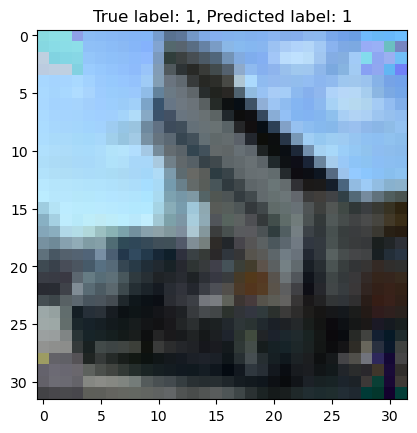

In [39]:
import matplotlib.pyplot as plt

# Select a random image from the test dataset
img_index = 10050
img = x_test[img_index]
true_label = y_test[img_index]

# Reshape the image to add a channel dimension
img = img.reshape((1,) + img.shape)

# Use the trained model to predict the label of the image
pred = model.predict(img)
pred_label = np.argmax(pred)

# Display the image and the predicted label
plt.imshow(x_test[img_index])
plt.title(f'True label: {np.argmax(true_label)}, Predicted label: {pred_label}')
plt.show()